In [2]:
import pandas as pd
df = pd.read_csv('./breast_cancer_dataset.csv')

In [3]:
df.shape

(569, 31)

In [4]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [6]:
x=df.drop(columns='target')
y=df['target']

In [7]:
x.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
y.head(2)

0    0
1    0
Name: target, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Acccuracy of the Decision Tree Classifier : {accuracy_dt}')


Acccuracy of the Decision Tree Classifier : 0.9473684210526315


In [22]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Acccuracy of the Random Forest Classifier : {accuracy_rf}')


Acccuracy of the Random Forest Classifier : 0.9649122807017544


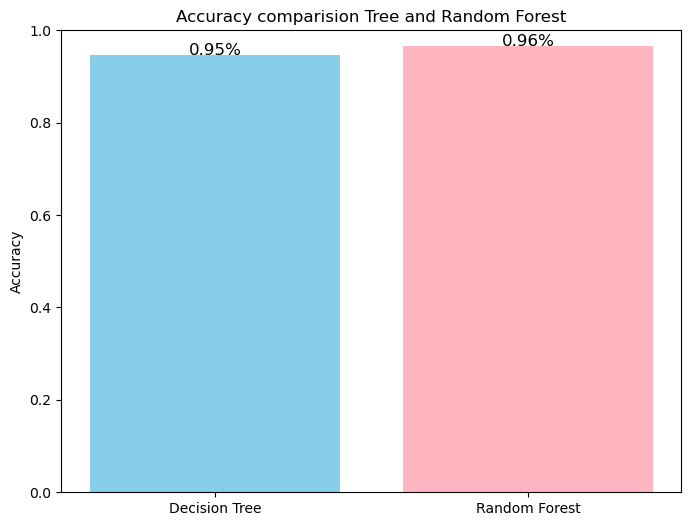

In [26]:
import matplotlib.pyplot as plt
algorithms = ['Decision Tree', 'Random Forest']
accuracies = [accuracy_dt, accuracy_rf]

plt.figure(figsize=(8,6))
plt.bar(algorithms, accuracies,color=['skyblue','lightpink'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Accuracy comparision Tree and Random Forest')

for i,accuracy in enumerate(accuracies):
    plt.text(i,accuracy + 0.01,f'{accuracy:.2f}%', ha='center', va='center', fontsize=12)